<a href="https://colab.research.google.com/github/jlgjosue/ia-dl-unyleya/blob/master/Tarefa_4_Processamento_de_Imagem_utilizando_Keras_para_classificar_imagens_de_objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 4
<p>Leia o terceiro capítulo da Unidade 2 e replique o exemplo apresentado no tópico “Processamento de Imagem: utilizando Keras para classificar imagens de objetos”, analisando-o linha a linha e comentando a função de cada comando presente no código. Comente cada saída gerada, justificando-a.
<p>Você deverá enviar o código em Python.

## import das bliotecas e dados

In [0]:
from keras.datasets import cifar10

from keras.layers.core import Dense, Activation

from keras.models import Sequential

from keras.utils import np_utils

Using TensorFlow backend.


## Separando os dados de teste e treino

In [0]:
 (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


# Reoganizando dados para melhor utilizacao 

In [0]:
X_train = X_train.reshape(50000, 3072)

X_test = X_test.reshape(10000, 3072)

## Transformar o conjunto de rótulos individuais para cada entrada

In [0]:
classes = 10

Y_train = np_utils.to_categorical(Y_train, classes)

Y_test = np_utils.to_categorical(Y_test, classes)

## especificar o tamanho da camada de entrada 

In [0]:
input_size = 3072

batch_size = 100

epochs = 100

## Difinindo a rede

In [0]:
       model = Sequential([
            Dense(1024, input_dim=input_size),

            Activation('relu'),

            Dense(512),

            Activation('relu'),

            Dense(512),

            Activation('sigmoid'),

            Dense(classes),

            Activation('softmax')

       ])


## Especificar de forma simples a função de custo (loss function) e sua otimização e fazo o treinamento


In [0]:
model.compile(loss='categorical_crossentropy',

metrics=['accuracy'], optimizer='sgd')

model.fit(X_train, Y_train, batch_size=batch_size,

epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s 526us/step - loss: 2.2198 - accuracy: 0.1624 - val_loss: 2.1037 - val_accuracy: 0.2150
Epoch 2/100
50000/50000 [==============================] - 26s 516us/step - loss: 2.0602 - accuracy: 0.2331 - val_loss: 2.0313 - val_accuracy: 0.2459
Epoch 3/100
50000/50000 [==============================] - 26s 517us/step - loss: 1.9776 - accuracy: 0.2724 - val_loss: 1.9730 - val_accuracy: 0.2876
Epoch 4/100
50000/50000 [==============================] - 26s 518us/step - loss: 1.9273 - accuracy: 0.2939 - val_loss: 1.9120 - val_accuracy: 0.2981
Epoch 5/100
50000/50000 [==============================] - 26s 514us/step - loss: 1.8984 - accuracy: 0.3077 - val_loss: 1.8564 - val_accuracy: 0.3282
Epoch 6/100
50000/50000 [==============================] - 25s 508us/step - loss: 1.8620 - accuracy: 0.3249 - val_loss: 1.8340 - val_accuracy: 0.3403
Epoch 7/100
50000/50000 [=========================

Visualizando o modelo treinado

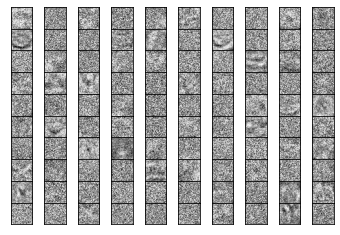

In [0]:
import matplotlib.pyplot as plt

import matplotlib.cm as cm

import matplotlib.gridspec as gridspec

import numpy

import random

        

fig = plt.figure()

outer_grid = gridspec.GridSpec(10, 10, wspace=0.0,

hspace=0.0)

        

weights = model.layers[0].get_weights()

       

w = weights[0].T

       

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):

            ax = plt.Subplot(fig, outer_grid[i])

            ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)

            ax.set_xticks([])

            ax.set_yticks([])

            fig.add_subplot(ax)

       

plt.show()